<a href="https://colab.research.google.com/github/duonghiepit/NetfixDataAnalyst/blob/main/NetflixDataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data Analyst**

Netflix is one of the most popular streaming services in the world, with a massive subscriber base. In this article we’re going to explore how data scientists can use Python to analyze Netflix data from various perspectives: how you watch Netflix and what you do once it finishes.


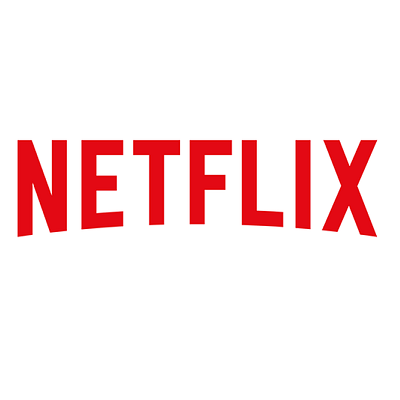

## Import Lib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset
df = pd.read_csv('NetflixDataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Checking the no. of rows and columns
df.shape

(7789, 11)

In [7]:
# List-down all the columns name
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [11]:
# Checking duplicated value
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [13]:
# Drop duplicated row
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [14]:
# Check the null value
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

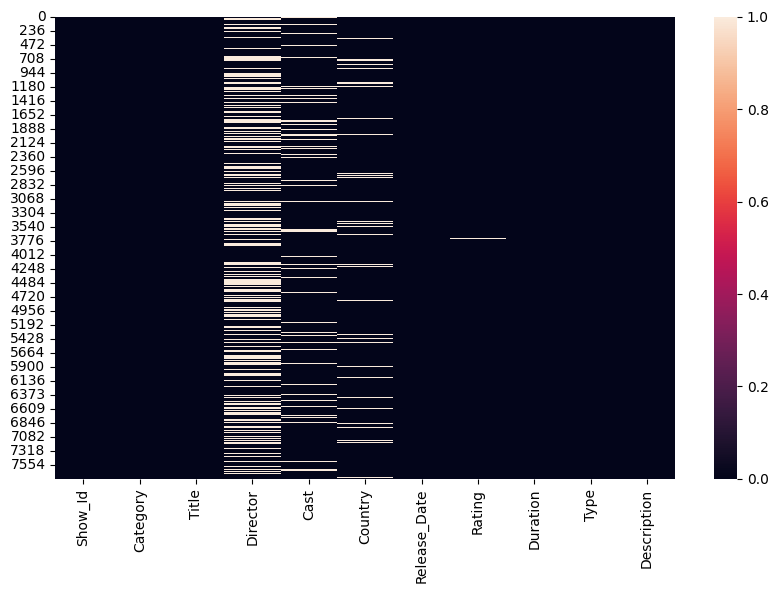

In [16]:
# Using heatmap to show null value count
plt.figure(figsize = [10, 6])
sns.heatmap(df.isnull())

In [17]:
# To show all the records of a particular time to any column
df[df['Title'].isin(['Zindagi Na Milegi Dobara'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...


In [18]:
# Formatting release_Date column
df['Date'] = pd.to_datetime(df['Release_Date'])
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [19]:
df['Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date, dtype: int64

<Axes: >

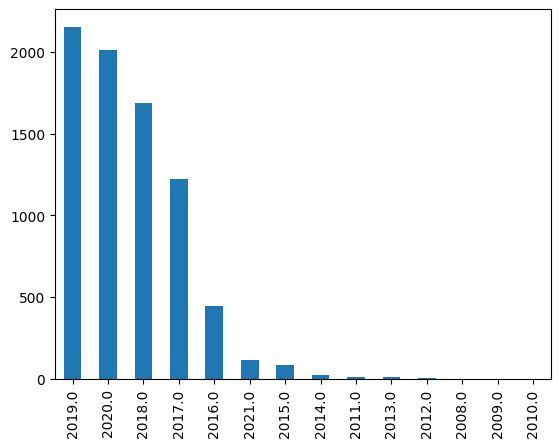

In [20]:
# Show with the bar graph
df['Date'].dt.year.value_counts().plot(kind='bar')

In [21]:
df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: >

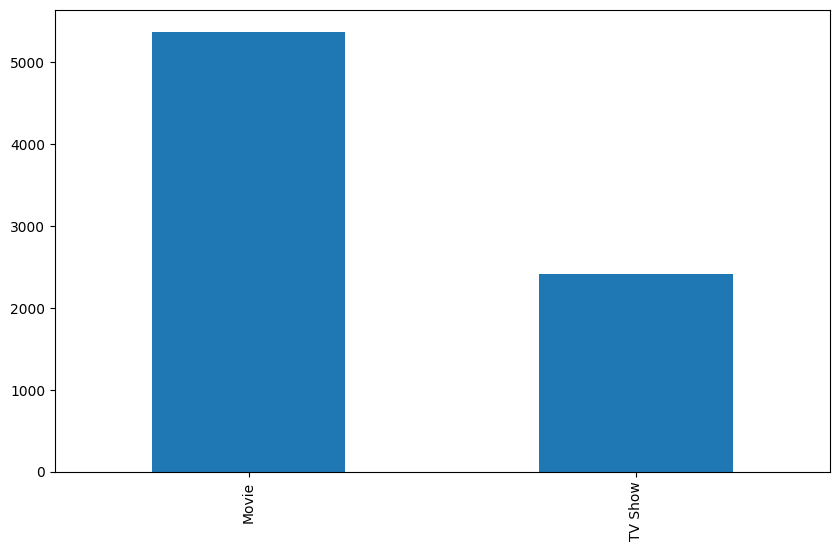

In [26]:
plt.figure(figsize=[10, 6])
df['Category'].value_counts().plot(kind='bar')

In [28]:
df['Year'] = df['Date'].dt.year
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [30]:
df.loc[(df['Year']==2016) & (df['Category']=='Movie')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,2016-06-30,2016.0
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,2016-12-01,2016.0
59,s60,Movie,1000 Rupee Note,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",India,"December 1, 2016",TV-14,89 min,"Dramas, International Movies",After randomly receiving a handsome political ...,2016-12-01,2016.0
62,s63,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,2016-08-13,2016.0


In [44]:
df[(df['Category']=='TV Show') & (df['Country']=='Japan')][['Title']]

,Title
24,​SAINT SEIYA: Knights of the Zodiac
260,A.I.C.O.
341,Aggretsuko
348,Ainori Love Wagon: African Journey
349,Ainori Love Wagon: Asian Journey
...,...
7389,Vampire Knight
7425,Violet Evergarden
7742,Your lie in April
7751,Yu-Gi-Oh!


In [37]:
df['Director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: Director, dtype: int64

In [40]:
df[(df['Category']=='Movie') & (df['Type']=='Comedies') | (df['Country']=='Vietnam')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14,2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26,2018.0


In [50]:
# Drop the null values
new_df = df.dropna()
new_df.reset_index(inplace=True, drop=True)
new_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
0,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0


In [56]:
new_df[new_df['Cast'].str.contains('Kevin')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
65,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...","United States, France, Serbia","December 1, 2020",PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky ...,2020-12-01,2020.0
112,s161,Movie,A Christmas Prince: The Royal Baby,John Schultz,"Rose McIver, Ben Lamb, Alice Krige, Honor Knea...",United States,"December 5, 2019",TV-PG,85 min,"Children & Family Movies, Dramas, Romantic Movies",Christmas brings the ultimate gift to Aldovia:...,2019-12-05,2019.0
115,s164,Movie,A Cinderella Story,Mark Rosman,"Hilary Duff, Chad Michael Murray, Jennifer Coo...","United States, Canada","January 1, 2020",PG,95 min,"Children & Family Movies, Comedies",Teen Sam meets the boy of her dreams at a danc...,2020-01-01,2020.0
234,s331,Movie,Aftermath,Elliott Lester,"Arnold Schwarzenegger, Scoot McNairy, Maggie G...","United Kingdom, United States","March 15, 2020",R,94 min,Dramas,After an air traffic controller's mistake resu...,2020-03-15,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",PG-13,118 min,"Classic Movies, Dramas, Independent Movies","In a backwater Iowa town, young Gilbert is tor...",2021-01-01,2021.0
4715,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",2020-01-01,2020.0
4724,s7639,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te...",2019-03-01,2019.0
4743,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,2020-01-01,2020.0


In [57]:
new_df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [58]:
new_df[(new_df['Rating']=='TV-PG') & (new_df['Country']=='Japan')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
177,s254,Movie,A Whisker Away,"Junichi Sato, Tomotaka Shibayama","Mirai Shida, Natsuki Hanae, Hiroaki Ogi, Koich...",Japan,"June 18, 2020",TV-PG,104 min,"Anime Features, Children & Family Movies, Inte...",A peculiar girl transforms into a cat to catch...,2020-06-18,2020.0
239,s343,Movie,Aggretsuko: We Wish You a Metal Christmas,Rarecho,"Kaolip, Shingo Kato, Komegumi Koiwasaki, Maki ...",Japan,"December 20, 2018",TV-PG,22 min,Movies,While Retsuko desperately makes plans for Chri...,2018-12-20,2018.0
657,s975,Movie,Bleach The Movie: Fade to Black,Noriyuki Abe,"Masakazu Morita, Fumiko Orikasa, Aya Hirano, H...",Japan,"October 15, 2016",TV-PG,94 min,"Action & Adventure, Anime Features, Sci-Fi & F...",When his mind is fogged by a scimitar-weilding...,2016-10-15,2016.0
867,s1335,Movie,Children of the Sea,Ayumu Watanabe,"Mana Ashida, Hiiro Ishibashi, Seishu Uragami, ...",Japan,"September 1, 2020",TV-PG,112 min,Anime Features,"Ruka spends her summer at the aquarium, where ...",2020-09-01,2020.0
1177,s1847,Movie,Dragon Quest Your Story,"Takashi Yamazaki, Ryuichi Yagi, Makoto Hanafusa","Takeru Sato, Kasumi Arimura, Haru, Kentaro Sak...",Japan,"February 13, 2020",TV-PG,103 min,"Action & Adventure, Anime Features, Children &...",Luca follows in his father's footsteps to resc...,2020-02-13,2020.0


In [61]:
count_with_highest_no_of_tvshows = new_df[new_df['Category']=='TV Show']
count_with_highest_no_of_tvshows.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0
94,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019.0
151,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...,2020-11-11,2020.0
181,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...,2018-03-09,2018.0
197,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0


In [63]:
count_with_highest_no_of_tvshows['Country'].value_counts().head()

United States     27
United Kingdom    19
Japan             10
South Korea       10
Spain              7
Name: Country, dtype: int64

<Axes: >

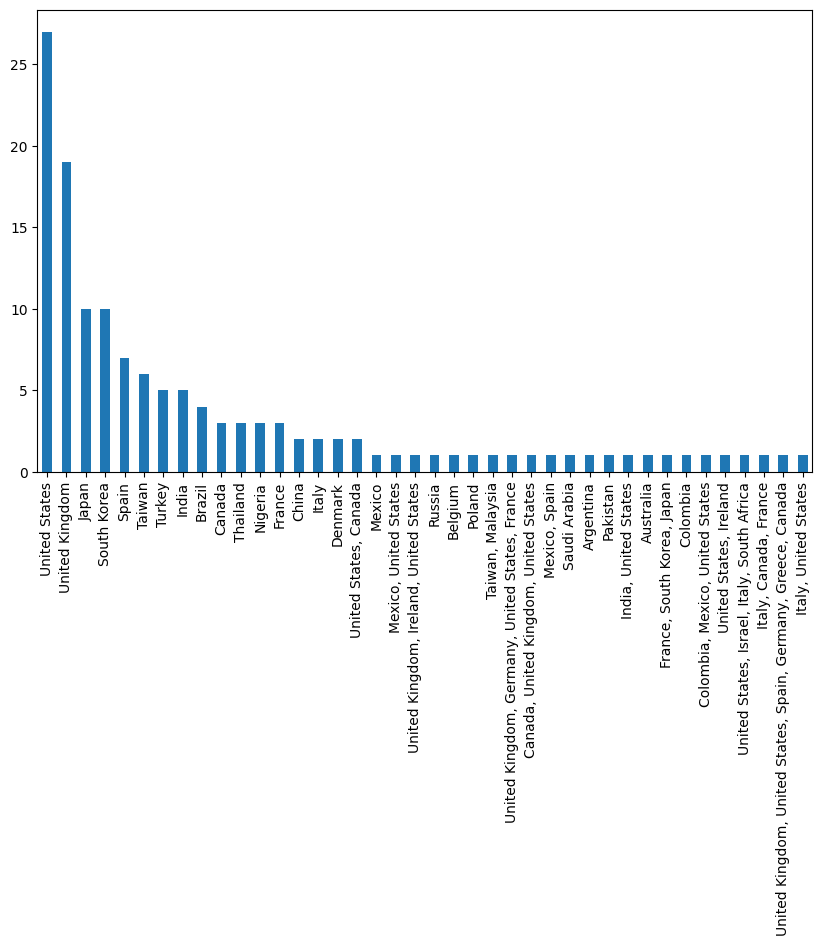

In [65]:
plt.figure(figsize=[10, 6])
count_with_highest_no_of_tvshows['Country'].value_counts().plot(kind='bar')